# 🚦 Task 4: US Accidents - Exploratory Analysis
Analyze traffic data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [1]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

/Users/chandrarekhakalyanig/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# 📥 Step 2: Load Dataset
df = pd.read_csv("US_Accidents_March23.csv")  # Ensure file is in your working directory

In [3]:
# 🧹 Step 3: Data Cleaning
df = df.dropna(subset=['Start_Lat', 'Start_Lng', 'Weather_Condition', 'Start_Time', 'Severity'])
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df = df.dropna(subset=['Start_Time'])

In [4]:
# ⏰ Step 4: Extract Time Features
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()

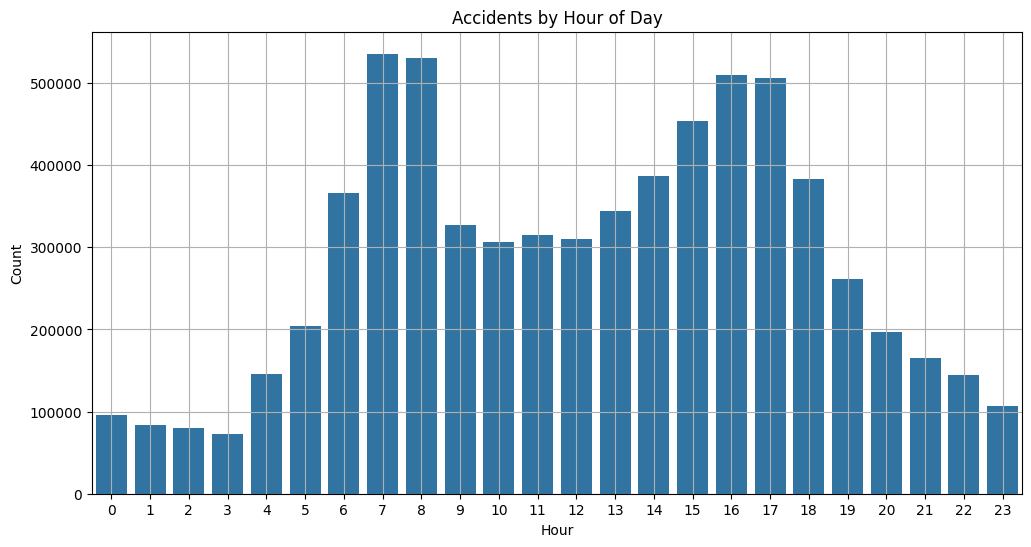

In [5]:
# 📊 Step 5: Plot Accidents by Hour
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour', order=range(24))
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.show()

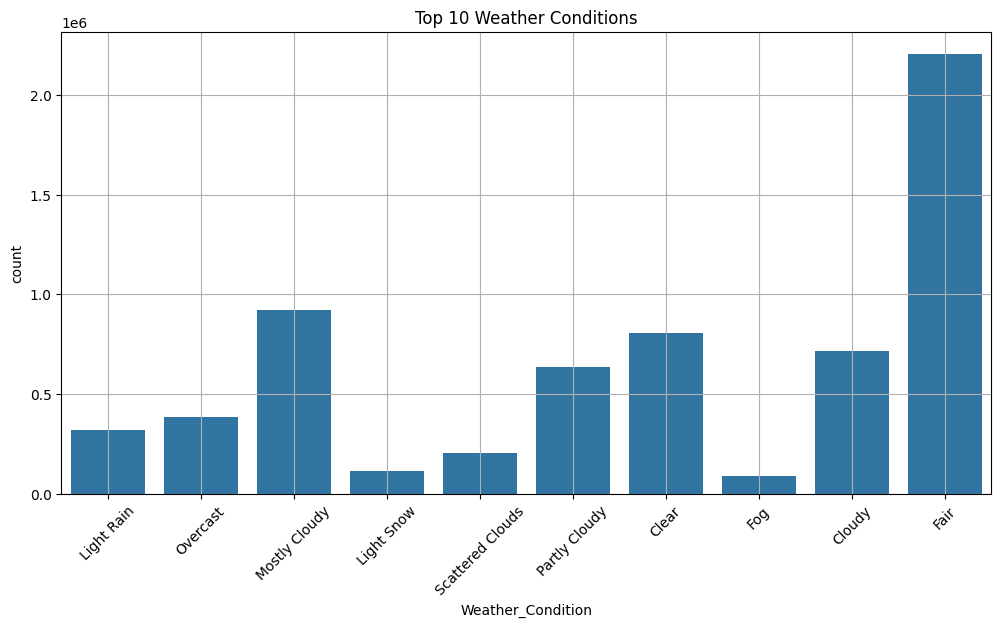

In [6]:
# 🌧️ Step 6: Top Weather Conditions
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Weather_Condition'].isin(top_weather)], x='Weather_Condition')
plt.title('Top 10 Weather Conditions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [7]:
# 🗺️ Step 7: Heatmap of Accident Hotspots
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(n=10000, random_state=42)
map_center = [sample_df['Start_Lat'].mean(), sample_df['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=5)
HeatMap(data=sample_df.values, radius=10).add_to(accident_map)
accident_map